# Spam Classification with Naive Bayes

### Project Objective: Develop an effective machine learning model capable of accurately classifying email messages as either spam or ham (not spam) using Naive Bayes algorithm.

In [32]:
# Naive Bayes is a probabilistic machine learning algorithm based on Bayes' theorem. It's primarily used for classification tasks,
# such as spam detection, sentiment analysis, and document categorization.

# Here's a breakdown:

# 1. Classification: Naive Bayes is used to classify data into predefined categories or classes. For example, it can predict whether
#    an email is spam or not spam.

# 2. Probabilistic: The algorithm calculates the probability of a data point belonging to each class and assigns it to the class with
#    the highest probability.

# 3. Bayes' Theorem: It's the foundation of Naive Bayes and describes the probability of an event based on prior knowledge of conditions
#    related to the event.

# 4. Naive Assumption: The algorithm assumes that features are independent of each other, which simplifies calculations but might be
#    unrealistic in some real-world scenarios.

## Importing libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

## Load dataset

In [35]:
df = pd.read_csv('Hamspam.csv', encoding='latin-1')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [36]:
#  'latin-1' is an older encoding and was commonly used in Western European languages.

# By using encoding='latin-1', we're telling pandas to interpret the text in the 'Hamspam.csv' file according to the
# 'latin-1' character set. This ensures that pandas reads the data correctly and represents the characters as intended.

## EDA

<Axes: xlabel='type', ylabel='count'>

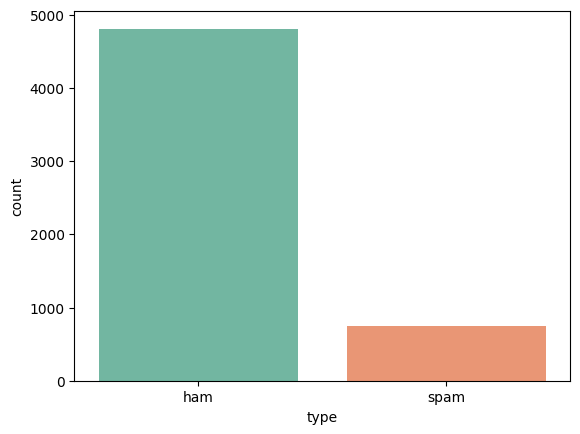

In [37]:
sns.countplot(x = df['type'], palette='Set2')

In [38]:
df['type'].value_counts()

,count
type,
ham,4812
spam,747


In [39]:
# From above countplot we can see that most of the content is not spam, while there are significant spam content as well
# which needs to be taken a note of.

In [40]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [41]:
# From above chart, the data suggests that the phrase "Sorry, I'll call later" is the most frequent occuring phrase
# in the dataset, appearing 30 times out of total 4812 'ham' type content.

In [42]:
df.isna().sum()

,0
type,0
text,0


In [43]:
# There are no missing records in the dataset.

## Data Preprocessing

In [44]:
# Labeling the spam (1) and ham (0)

In [45]:
df['label'] = df['type'].map({'spam':1, 'ham':0})
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [46]:
# Dividing ham and spam dataframes

In [47]:
ham = df[df['type'] == 'ham']
spam = df[df['type'] == 'spam']

In [48]:
ham

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,0
6,ham,Are you this much buzy,0
...,...,...,...
5552,ham,Already one guy loving you:-.,0
5553,ham,Prepare to be pounded every night...,0
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0


In [49]:
spam

,type,text,label
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
8,spam,Marvel Mobile Play the official Ultimate Spide...,1
19,spam,U can WIN å£100 of Music Gift Vouchers every w...,1
34,spam,U have won a nokia 6230 plus a free digital ca...,1
...,...,...,...
5532,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1
5538,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,1
5551,spam,Ur balance is now å£500. Ur next question is: ...,1
5556,spam,"If you don't, your prize will go to another cu...",1


## Text Cleaning

In [50]:
lemma = WordNetLemmatizer()

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [56]:
corpus = []

for i in range(len(df)):
  msg = re.sub('[^a-zA-Z]',' ',df['text'][i]) # Clean the text
  msg = msg.lower() # Convert to lowercase
  msg = msg.split() # Word Tokenize
  msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] # Lemmatization and stopwords removal
  msg = ' '.join(msg) # Join sentences
  corpus.append(msg)

In [57]:
# re.sub() is specifically for substituting parts of a string that match a given pattern with a replacement string.

# [^...]: This part means "match any character that is NOT within this bracket". The entire pattern means "match any character
# that is not an alphabet (a-z or A-Z)". This would target special characters, numbers, punctuation, and spaces.

# ' ': This is the replacement string. It's a single space. This means that any character matched by the pattern will be
# replaced with a single space.

# df['text'][i]: This is the input string that re.sub() is working on.
# [i]: This selects a specific row from the 'text' column based on the loop index i.


# This line of code takes a text string from the 'text' column of a Pandas DataFrame (df), and then uses regular expressions
# to remove or replace any character that is not an alphabet (a-z or A-Z). These characters are replaced by a single space.
# The cleaned text is then assigned to the variable msg.

In [58]:
# msg = ' '.join(msg)

# This line of code takes the individual elements within the msg list (likely words or tokens) and combines them into
# a single string with spaces in between.

# Example: If msg contained the list ['Hello', 'world'], after running this line, msg would contain the string "Hello world".

In [59]:
corpus

['hope good week checking',
 'k give back thanks',
 'also cbe pay',
 'complimentary star ibiza holiday cash need urgent collection landline lose box sk wp ppm',
 'okmail dear dave final notice collect tenerife holiday cash award call landline tc sae box cw wx ppm',
 'aiya discus later lar pick u',
 'much buzy',
 'please ask mummy call father',
 'marvel mobile play official ultimate spider man game ur mobile right text spider game send u free ball wallpaper',
 'fyi usf swing room whenever',
 'sure thing big man hockey election go longer hour though',
 'anything lor',
 'march ending ready call sure problem capital never complete far work lady',
 'hmm well night night',
 'k sure get noon see',
 'ha ha cool cool chikku chikku db',
 'darren saying dat u meeting da ge den dun meet dinner co later u leave xy feel awkward den u meet lunch lor',
 'dint tell anything angry told abi',
 'u u wan come come lor din c stripe skirt',
 'u win music gift voucher every week starting txt word draw tscs ww

## WordCloud

In [77]:
def wordcl(data,heading):
  txt = ' '.join(data['text'])
  wc = WordCloud(background_color='white', width = 2000, height = 1000, colormap = 'viridis').generate(txt)
  plt.imshow(wc)
  plt.axis('off')
  plt.title('WordCloud')

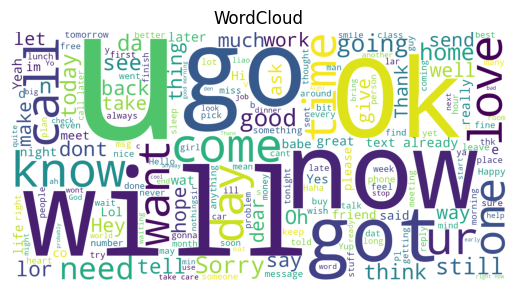

In [78]:
wordcl(ham,'HAM')

In [87]:
# From above 'Ham' Wordcloud, we clearly see that words like 'u', 'go', 'will', 'Ok' and 'now' are the most frequently occuring
# words in the ham dataframe.

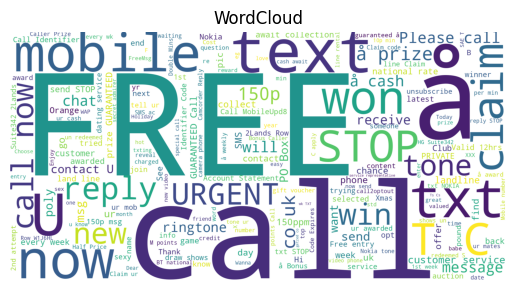

In [79]:
wordcl(spam,'SPAM')

In [88]:
# From above 'Spam' Wordcloud, we can tell that the most frequent words or phrases used for a spam email or text are
# 'FREE', 'call', 'URGENT', 'STOP', 'now', 'won', 'mobile' and 'text', suggesting certain tricks used by fraudsters to quickly
# reply to a call or text hinting at certain rewards are awaiting. The consumers should be cautious and aware of these key
# words or phrases used by the fraudsters which are most likely Spam.

In [92]:
# Applying N-grams technique to get frequency of most occuring word associations

def plot_ngrams(df, n=1):
  vectorizer = CountVectorizer(ngram_range=(n, n))
  ngrams = vectorizer.fit_transform(df['text'])
  ngrams_freq = ngrams.sum(axis=0).A1 # .A1 attribute converts the matrix obtained in the previous step into a 1-dimensional NumPy array. This makes it easier to work with the frequency data.
  ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
  ngrams_df = ngrams_df.sort_values(by='Frequency', ascending=False)
  ngrams_df = ngrams_df.head(20)


  plt.figure(figsize=(15,10))
  sns.barplot(x='Frequency', y=ngrams_df.index, data=ngrams_df, palette='viridis')
  plt.title(f'Top 20 {n}-grams')
  plt.show()

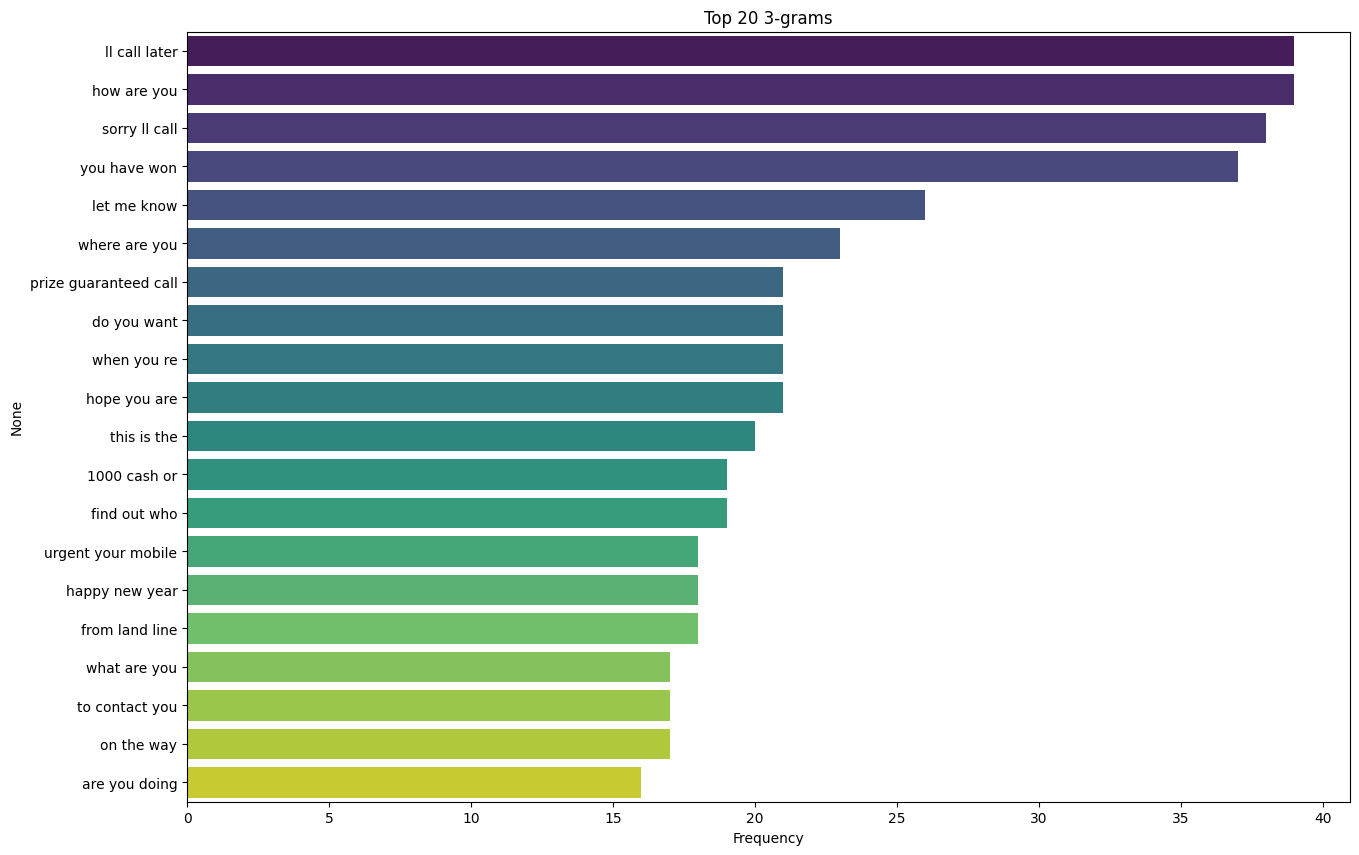

In [100]:
# Trigrams
plot_ngrams(df, n=3)

In [101]:
# Most occuring trigrams in the dataset are 'll call later' and 'how are you'.

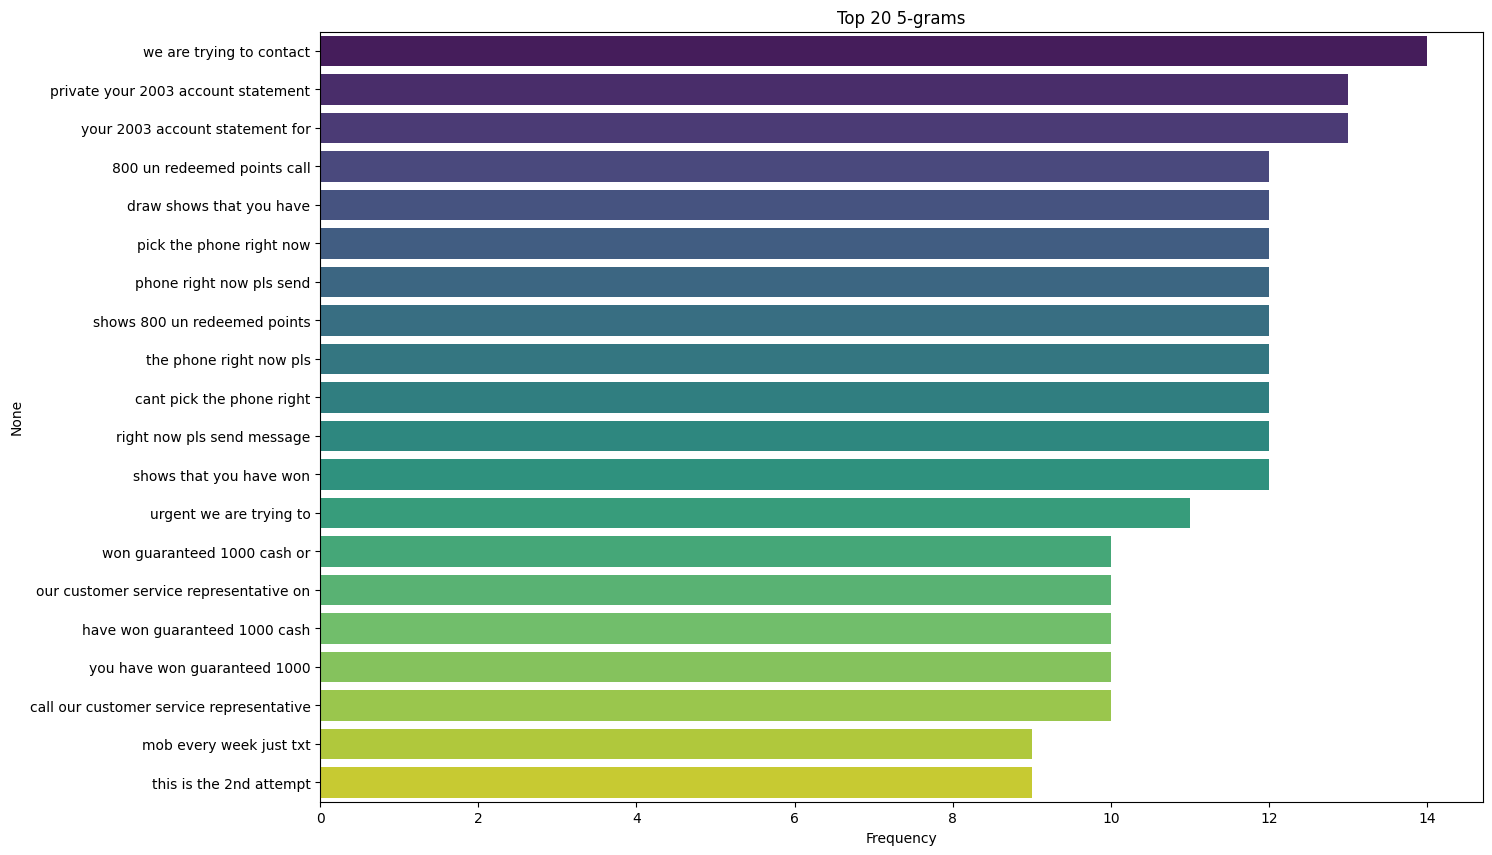

In [102]:
# Pentagrams
plot_ngrams(df, n=5)

In [103]:
# Most occuring pentagrams in the dataset are 'we are trying to contact' and 'private your 2003 account statement'

## Model Building

#### Tf-IDF

In [63]:
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [64]:
y = df['label']
y

,label
0,0
1,0
2,0
3,1
4,1
...,...
5554,0
5555,0
5556,1
5557,1


In [65]:
tf = TfidfVectorizer()

x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
# This line transforms the text data in corpus into a numerical representation using the TF-IDF technique. It then converts the result
# into a NumPy array. This numerical representation is crucial for machine learning models to process text data.

In [67]:
x.shape

(5559, 7052)

In [68]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,7042,7043,7044,7045,7046,7047,7048,7049,7050,7051
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [70]:
nb = MultinomialNB() # Initialize Naive Bayes model

nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [71]:
# MultinomialNB() implements the Multinomial Naive Bayes algorithm, which is particularly well-suited for
# classification tasks with discrete features, such as text classification.

# It applies Bayes' theorem to calculate the probability of a document belonging to a specific class
# based on the observed word frequencies.

# It assumes that the features (word counts) follow a multinomial distribution, which is appropriate for
# discrete data like word counts.

# Like other Naive Bayes classifiers, it assumes that features are conditionally independent of each other
# given the class. This simplification allows for efficient computation.

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
print(f"Training Accuracy: {nb.score(x_train,y_train)}")
print(f"Testing Accuracy: {nb.score(x_test,y_test)}")

Training Accuracy: 0.9797616370586912
Testing Accuracy: 0.9640287769784173


In [74]:
from sklearn.metrics import classification_report

In [75]:
report = classification_report(y_test, y_pred)

In [76]:
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.74      0.85       155

    accuracy                           0.96      1112
   macro avg       0.98      0.87      0.92      1112
weighted avg       0.97      0.96      0.96      1112



## Conclusion:

#### We achieved a high accuracy of 0.96 for our Naive Bayes model with 100% precision in detecting spam text which is essential for our project objective, making our model highly suitable for Spam Classification.